In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #svg
import pylab as plb
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator
plb.rcParams['image.interpolation'] = 'Nearest'
plb.rcParams['image.cmap'] = 'BrBG'
recalc_means = False #recalculate the groupwise mean stats. Set to False to load from file
demo_mode = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
import h5py
trial_db = h5py.File('../02_imaging_post_processing/trial_db.hdf5','r')

In [3]:
trial_types = set(trial_db['trial_names'])
test_set = list(trial_types.difference(['flight_starts','flight_stops','stripe_fix']))
fly_set_22H05_rot = set(gd.GMR22H05_yr_list).union(set(gd.GMR22H05_pr_list))
#fly_set_39D01_rot = set(gd.GMR39E01_yr_list).union(set(gd.GMR39E01_pr_list))
fly_set_39E01_rot = set(gd.GMR39E01_yr_list).union(set(gd.GMR39E01_pr_list))
#set(gd.GMR22H05_pr_list)
#fly_set_39E01 = set(gd.GMR39E01_list)

In [4]:
#mask out the data so only the trial types in test_set will be included we dont want to look
#at stripe fixation, or flight initataion or termination events
trial_mask = np.zeros(np.shape(trial_db['trial_names'])[0]).astype(bool)
for trial_name in test_set:
    trial_mask |= (np.array(trial_db['trial_names']) == trial_name)

#now mask out the data to only include the flys in gd.GRM22H05_list
fly_mask_22H05_rot = np.zeros_like(trial_mask,dtype = bool)
for fly in fly_set_22H05_rot:
    fly_mask_22H05_rot |= (np.array(trial_db['fly_numbers']) == fly)
    
#now mask out the data to only include the flys in gd.GRM39E01_list
fly_mask_39E01_rot = np.zeros_like(trial_mask,dtype = bool)
for fly in fly_set_39E01_rot:
    fly_mask_39E01_rot |= (np.array(trial_db['fly_numbers']) == fly)

#update the mask    
mask_22H05_rot = trial_mask & fly_mask_22H05_rot
mask_39E01_rot = trial_mask & fly_mask_39E01_rot

time_mask = gd.get_xio('pth_roll_0')<10
trial_samples = np.sum(time_mask)
# Create a selection array to include only epochs with flight for for the entire trial - i.e. the number of samples
# with a wing-beat frequency > 100  was equal to the number of samples in the trial
flt_selection = np.nansum(np.array(trial_db['wb_frequency']) > 100,axis = 1)>=trial_samples
mask_22H05_rot &=  flt_selection
mask_39E01_rot &=  flt_selection

In [5]:
import os
os.remove('open_loop_rotation_22H05_ptch_roll.hdf5')
os.remove('open_loop_rotation_39E01_ptch_roll.hdf5')

In [6]:
mtd_22H05 = h5py.File('open_loop_rotation_22H05_ptch_roll.hdf5','a')
mtd_39E01 = h5py.File('open_loop_rotation_39E01_ptch_roll.hdf5','a')

In [7]:
def get_norm_term(signal,mask = mask_22H05_rot,xi_range = (-3,0),xio_trial_name = 'pth_roll_0'):
    """get the norm and mean value over the samples in the time range xi_range 
    for the data in the matrix 'signals' with rows selected by mask. trial_name is
    used to determine the mapping from samples to times in xi_range"""
    #print np.sum(mask)
    data_selection = trial_db[signal][mask,:]
    xi = gd.get_xio(trial_name)
    baseline_mask = (xi>xi_range[0]) & (xi<[xi_range[1]]) 
    mean_val = np.nanmean(data_selection[:,baseline_mask])#,axis = 1)[:,np.newaxis]
    subtracted_selection = data_selection-mean_val
    return np.nanstd(subtracted_selection[:,baseline_mask]),mean_val

In [8]:
#create dictionary to store the normalization values
signal_norms_22H05 = dict()
signal_means_22H05 = dict()
#the signal norms will be computed for the 'matrix' like signals, init with a blank selection mask
[signal_norms_22H05.update({signame:np.zeros_like(mask_22H05_rot)}) for signame,dset in trial_db.items() if (np.ndim(dset)>1)];
[signal_means_22H05.update({signame:np.zeros_like(mask_22H05_rot)}) for signame,dset in trial_db.items() if (np.ndim(dset)>1)];
#create a vector of norm values for each trial
for fly in fly_set_22H05_rot: #loop over all the flies in fly_set
    fly_selection_mask = np.array(trial_db['fly_numbers']) == fly #create a selection mask for the fly
    for nor,mea in zip(signal_norms_22H05.items(),signal_means_22H05.items()): #loop over all the signals
        sig_key = nor[0]
        norm_array = nor[1]
        mean_array = mea[1]
        norm_val,mean_val = get_norm_term(sig_key,mask = fly_selection_mask,xio_trial_name = 'pth_roll_0')
        if ~np.isfinite(norm_val):
            norm_val = 0
        if ~np.isfinite(mean_val):
            mean_val = 0
        signal_norms_22H05[sig_key] = norm_array + (fly_selection_mask*norm_val) #add in the normalization values
        signal_means_22H05[sig_key] = mean_array + (fly_selection_mask*mean_val)

84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
94
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
118
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113
113


In [9]:
#Do it again for 39E01
signal_norms_39E01 = dict()
signal_means_39E01 = dict()
#the signal norms will be computed for the 'matrix' like signals, init with a blank selection mask
[signal_norms_39E01.update({signame:np.zeros_like(mask_39E01_rot)}) for signame,dset in trial_db.items() if (np.ndim(dset)>1)];
[signal_means_39E01.update({signame:np.zeros_like(mask_39E01_rot)}) for signame,dset in trial_db.items() if (np.ndim(dset)>1)];
#create a vector of norm values for each trial
for fly in fly_set_39E01_rot: #loop over all the flies in fly_set
    fly_selection_mask = np.array(trial_db['fly_numbers']) == fly #create a selection mask for the fly
    for nor,mea in zip(signal_norms_39E01.items(),signal_means_39E01.items()): #loop over all the signals
        sig_key = nor[0]
        norm_array = nor[1]
        mean_array = mea[1]
        norm_val,mean_val = get_norm_term(sig_key,mask = fly_selection_mask,xio_trial_name = 'pth_roll_0')
        if ~np.isfinite(norm_val):
            norm_val = 0
        if ~np.isfinite(mean_val):
            mean_val = 0
        signal_norms_39E01[sig_key] = norm_array + (fly_selection_mask*norm_val) #add in the normalization values
        signal_means_39E01[sig_key] = mean_array + (fly_selection_mask*mean_val)

116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
116
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
122
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
104
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
124
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
102
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
111
114
114
114
114
114
114
114
114
114
114


In [10]:
#dataset to hold the normalized data
mtd_22H05.create_group('normed_signals')
#also save a copy of the untransformed data 
mtd_22H05.create_group('selected_signals')
mtd_22H05.create_group('signal_means')
mtd_22H05.create_group('signal_norms')

#dataset to hold the normalized data
mtd_39E01.create_group('normed_signals')
#also save a copy of the untransformed data 
mtd_39E01.create_group('selected_signals')
mtd_39E01.create_group('signal_means')
mtd_39E01.create_group('signal_norms')

<HDF5 group "/signal_norms" (0 members)>

In [11]:
for k in signal_norms_22H05.keys():
    ssig = trial_db[k][mask_22H05_rot,:]
    flb.update_dset(mtd_22H05['selected_signals'],k,ssig)
    xi = gd.get_xio('pth_roll_0')
    baseline_idx = xi<0
    nsig = (ssig - signal_means_22H05[k][mask_22H05_rot][:,np.newaxis])/signal_norms_22H05[k][mask_22H05_rot][:,np.newaxis]
    flb.update_dset(mtd_22H05['normed_signals'],k,nsig)
    flb.update_dset(mtd_22H05['signal_norms'],k,signal_norms_22H05[k][mask_22H05_rot])
    flb.update_dset(mtd_22H05['signal_means'],k,signal_means_22H05[k][mask_22H05_rot])

In [12]:
for k in signal_norms_39E01.keys():
    ssig = trial_db[k][mask_39E01_rot,:]
    flb.update_dset(mtd_39E01['selected_signals'],k,ssig)
    xi = gd.get_xio('pth_roll_0')
    baseline_idx = xi<0
    nsig = (ssig - signal_means_39E01[k][mask_39E01_rot][:,np.newaxis])/signal_norms_39E01[k][mask_39E01_rot][:,np.newaxis]
    flb.update_dset(mtd_39E01['normed_signals'],k,nsig)
    flb.update_dset(mtd_39E01['signal_norms'],k,signal_norms_39E01[k][mask_39E01_rot])
    flb.update_dset(mtd_39E01['signal_means'],k,signal_means_39E01[k][mask_39E01_rot])

In [13]:
#now apply the masked selection to the trial description vectors and store
for key,dset in trial_db.items():
    if (np.ndim(dset)<2):
        if not(key == u'signal_units'):
            flb.update_dset(mtd_22H05['selected_signals'],key,dset[mask_22H05_rot])

In [14]:
#now apply the masked selection to the trial description vectors and store
for key,dset in trial_db.items():
    if (np.ndim(dset)<2):
        if not(key == u'signal_units'):
            flb.update_dset(mtd_39E01['selected_signals'],key,dset[mask_39E01_rot])

In [15]:
#use the left-right amplitude (Ph2) as the sort index
stim_ep = (0,3)
sig = np.array(mtd_22H05['normed_signals']['Ph2'])
sort_idx = np.argsort(np.mean(sig[:,(xi>stim_ep[0]) & (xi<stim_ep[1])],axis = 1))[::-1] #reverse ordered
flb.update_dset(mtd_22H05,'sort_idx',sort_idx)

In [16]:
#use the left-right amplitude (Ph2) as the sort index
stim_ep = (0,3)
sig = np.array(mtd_39E01['normed_signals']['Ph2'])
sort_idx = np.argsort(np.mean(sig[:,(xi>stim_ep[0]) & (xi<stim_ep[1])],axis = 1))[::-1] #reverse ordered
flb.update_dset(mtd_39E01,'sort_idx',sort_idx)

In [17]:
for key,value in mtd_22H05['normed_signals'].items():
    mtd_22H05['normed_signals'][key][:] = np.array(mtd_22H05['normed_signals'][key])[mtd_22H05['sort_idx']]
for key,value in mtd_22H05['selected_signals'].items():
    mtd_22H05['selected_signals'][key][:] = np.array(mtd_22H05['selected_signals'][key])[mtd_22H05['sort_idx']]

In [18]:
for key,value in mtd_39E01['normed_signals'].items():
    mtd_39E01['normed_signals'][key][:] = np.array(mtd_39E01['normed_signals'][key])[mtd_39E01['sort_idx']]
for key,value in mtd_39E01['selected_signals'].items():
    mtd_39E01['selected_signals'][key][:] = np.array(mtd_39E01['selected_signals'][key])[mtd_39E01['sort_idx']]

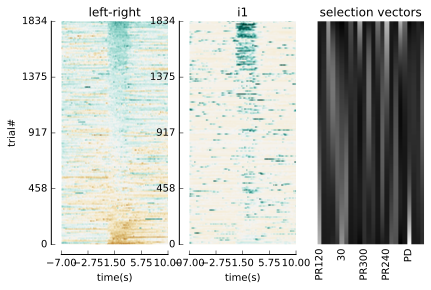

In [19]:
#Check to see if trials are sorted correctly and examine
# how the trial types are co-sorted by lmr response
reload(gd)
import plotfuncs as plf
xi = gd.get_xio('pth_roll_0')
plb.figure(figsize = (6.5,4))

plb.subplot(1,3,1)
shp = np.shape(mtd_22H05['normed_signals']['Ph2'])
plb.imshow(mtd_22H05['normed_signals']['Ph2'],
           aspect = 'auto',
           vmin = -6,vmax = 6,
           extent = (xi[0],xi[-1],0,shp[0]))
plb.gca().set_xbound(-7,10)
plf.pull_ax_spines(xtick_numbers = 5)
bnds = plb.gca().get_ybound()
plb.gca().set_yticklabels(np.linspace(0,bnds[-1],5,dtype = int));
plb.gca().set_xlabel('time(s)')
plb.gca().set_ylabel('trial#')
plb.gca().set_title('left-right')

plb.subplot(1,3,2)
shp = np.shape(mtd_22H05['normed_signals']['i1'])
plb.imshow(mtd_22H05['normed_signals']['i1'],
           aspect = 'auto',
           vmin = -6,vmax = 6,
           extent = (xi[0],xi[-1],0,shp[0]))
plb.gca().set_xbound(-7,10)
plf.pull_ax_spines(xtick_numbers = 5)
bnds = plb.gca().get_ybound()
plb.gca().set_yticklabels(np.linspace(0,bnds[-1],5,dtype = int));
plb.gca().set_xlabel('time(s)')
plb.gca().set_title('i1')

trial_list = list(set(mtd_22H05['selected_signals']['trial_names']))

def smooth_inter_fun(r):
    from scipy import interpolate
    s = interpolate.UnivariateSpline(np.arange(len(r)), r)
    s.set_smoothing_factor(120)
    xnew = np.arange(0, len(r)-1, .1)
    return s(xnew)

trial_mtrx = [smooth_inter_fun((np.array(mtd_22H05['selected_signals']['trial_names']) == sig)) for sig in trial_list]
plb.subplot(1,3,3)
plb.imshow(np.array(trial_mtrx).T[::-1],aspect = 'auto',cmap = plb.cm.gray)
plf.kill_spines()
trial_list = [gd.trial_to_label[tr] for tr in trial_list]
trial_list = [None] + trial_list
plb.gca().set_xticklabels(trial_list,rotation = 90)
[x.set_visible(True) for x in plb.gca().get_xticklabels()]

plb.gca().get_xaxis().majorTicks[1].label1.set_horizontalalignment('center')
plb.gca().set_title('selection vectors')

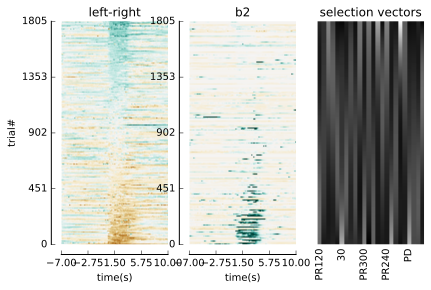

In [20]:
#Check to see if trials are sorted correctly and examine
# how the trial types are co-sorted by lmr response
reload(gd)
import plotfuncs as plf
xi = gd.get_xio('pth_roll_0')
plb.figure(figsize = (6.5,4))

plb.subplot(1,3,1)
shp = np.shape(mtd_39E01['normed_signals']['Ph2'])
plb.imshow(mtd_39E01['normed_signals']['Ph2'],
           aspect = 'auto',
           vmin = -6,vmax = 6,
           extent = (xi[0],xi[-1],0,shp[0]))
plb.gca().set_xbound(-7,10)
plf.pull_ax_spines(xtick_numbers = 5)
bnds = plb.gca().get_ybound()
plb.gca().set_yticklabels(np.linspace(0,bnds[-1],5,dtype = int));
plb.gca().set_xlabel('time(s)')
plb.gca().set_ylabel('trial#')
plb.gca().set_title('left-right')

plb.subplot(1,3,2)
shp = np.shape(mtd_39E01['normed_signals']['b2'])
plb.imshow(mtd_39E01['normed_signals']['b2'],
           aspect = 'auto',
           vmin = -6,vmax = 6,
           extent = (xi[0],xi[-1],0,shp[0]))
plb.gca().set_xbound(-7,10)
plf.pull_ax_spines(xtick_numbers = 5)
bnds = plb.gca().get_ybound()
plb.gca().set_yticklabels(np.linspace(0,bnds[-1],5,dtype = int));
plb.gca().set_xlabel('time(s)')
plb.gca().set_title('b2')

trial_list = list(set(mtd_39E01['selected_signals']['trial_names']))

def smooth_inter_fun(r):
    from scipy import interpolate
    s = interpolate.UnivariateSpline(np.arange(len(r)), r)
    s.set_smoothing_factor(120)
    xnew = np.arange(0, len(r)-1, .1)
    return s(xnew)

trial_mtrx = [smooth_inter_fun((np.array(mtd_39E01['selected_signals']['trial_names']) == sig)) for sig in trial_list]
plb.subplot(1,3,3)
plb.imshow(np.array(trial_mtrx).T[::-1],aspect = 'auto',cmap = plb.cm.gray)
plf.kill_spines()
trial_list = [gd.trial_to_label[tr] for tr in trial_list]
trial_list = [None] + trial_list
plb.gca().set_xticklabels(trial_list,rotation = 90)
[x.set_visible(True) for x in plb.gca().get_xticklabels()]

plb.gca().get_xaxis().majorTicks[1].label1.set_horizontalalignment('center')
plb.gca().set_title('selection vectors')

In [21]:
trial_db.close()
mtd_22H05.flush()
mtd_22H05.close()
mtd_39E01.flush()
mtd_39E01.close()